In [20]:
!pip install easyocr
!pip install imutils

In [21]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

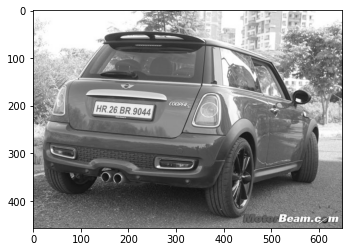

In [22]:
image = cv2.imread('image1.jpg')
gray_scale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_scale_image, cv2.COLOR_BGR2RGB))

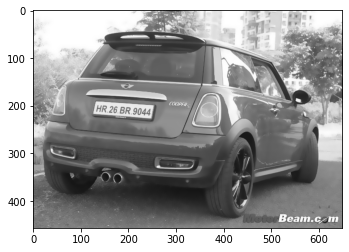

In [23]:
bilateral_filter = cv2.bilateralFilter(gray_scale_image, 11, 17, 17) #Noise reduction blurs the image for better detection
plt.imshow(cv2.cvtColor(bilateral_filter, cv2.COLOR_BGR2RGB))

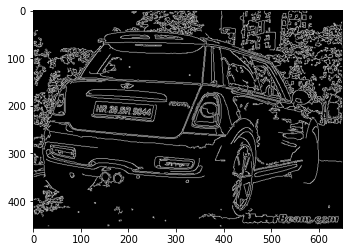

In [24]:
#Edge detection
edged_image = cv2.Canny(bilateral_filter, 30, 200) 
plt.imshow(cv2.cvtColor(edged_image, cv2.COLOR_BGR2RGB))

In [25]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [26]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

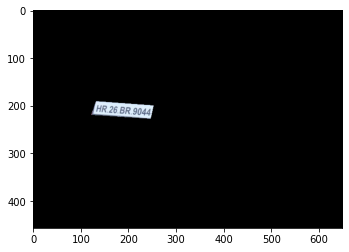

In [28]:
mask = np.zeros(gray_scale_image.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [29]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray_scale_image[x1:x2+1, y1:y2+1]

In [30]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[6, 4], [128, 4], [128, 34], [6, 34]], 'HR.26 BR.9044', 0.5728024956877317)]

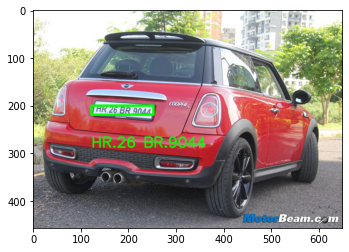

In [31]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(image, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(image, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))